In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

semilla = 2230

# Carga del conjunto de datos
df = pd.read_csv('Valhalla23.csv')

# Separacion de características y variable objetivo
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# División en entrenamiento, validacion y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=semilla)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=semilla)

# Estandarizacion de las caracteristicas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [43]:
model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=semilla)
model.fit(X_train, y_train)


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=2230)

In [44]:

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_val = mean_squared_error(y_val, model.predict(X_val))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print("MSE Entrenamiento:", mse_train)
print("MSE Validación:", mse_val)
print("MSE Prueba:", mse_test)


MSE Entrenamiento: 54.86359203360229
MSE Validación: 40.09127201530285
MSE Prueba: 53.59626893486243


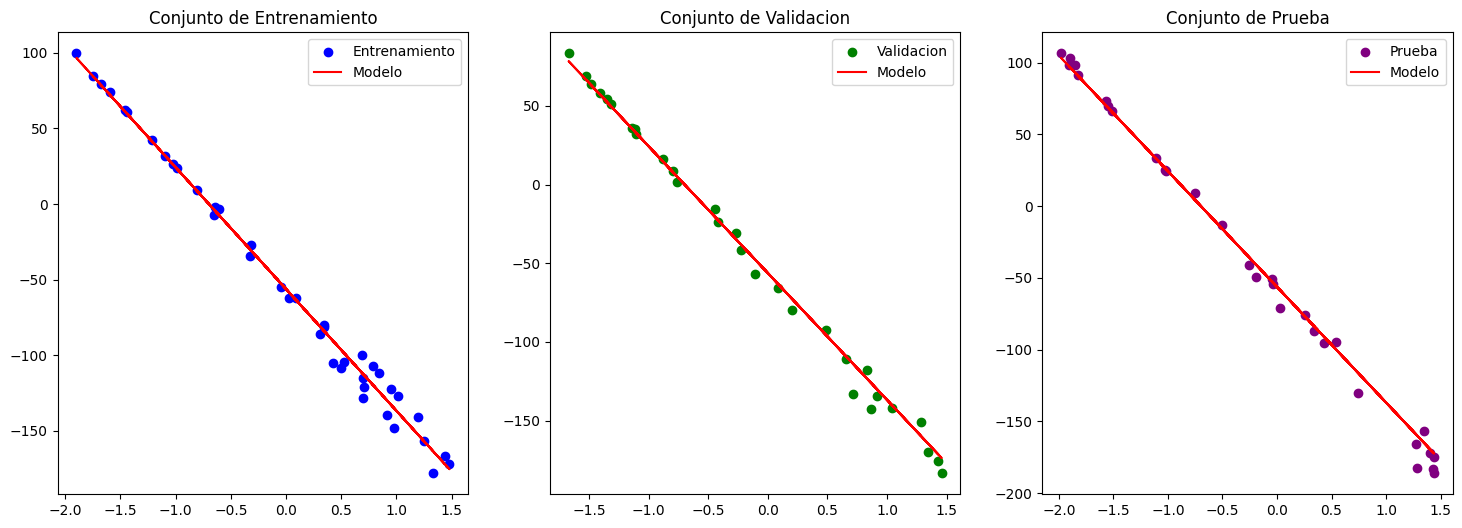

In [46]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Entrenamiento')
plt.plot(X_train[:, 0], y_train_pred, color='red', label='Modelo')
plt.title('Conjunto de Entrenamiento')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_val[:, 0], y_val, color='green', label='Validacion')
plt.plot(X_val[:, 0], y_val_pred, color='red', label='Modelo')
plt.title('Conjunto de Validacion')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], y_test, color='purple', label='Prueba')
plt.plot(X_test[:, 0], y_test_pred, color='red', label='Modelo')
plt.title('Conjunto de Prueba')
plt.legend()

plt.show()


In [48]:
sizes = np.random.choice(range(2, 40), size=20, replace=False)
if 2 not in sizes:
    sizes[0] = 2
sizes = sorted(sizes)


In [49]:
n = 100
train_errors = []
val_errors = []

for size in sizes:
    temp_train_errors = []
    temp_val_errors = []
    
    for _ in range(n):
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=np.random.randint(10000))
        model.fit(X_train_sample, y_train_sample)
        
        temp_train_errors.append(mean_squared_error(y_train_sample, model.predict(X_train_sample)))
        temp_val_errors.append(mean_squared_error(y_val, model.predict(X_val)))
    
    train_errors.append(np.mean(temp_train_errors))
    val_errors.append(np.mean(temp_val_errors))


In [51]:
train_errors = [np.mean(te) for te in train_errors]
val_errors = [np.mean(ve) for ve in val_errors]
train_errors.insert(0, mse_train)
val_errors.insert(0, mse_val)

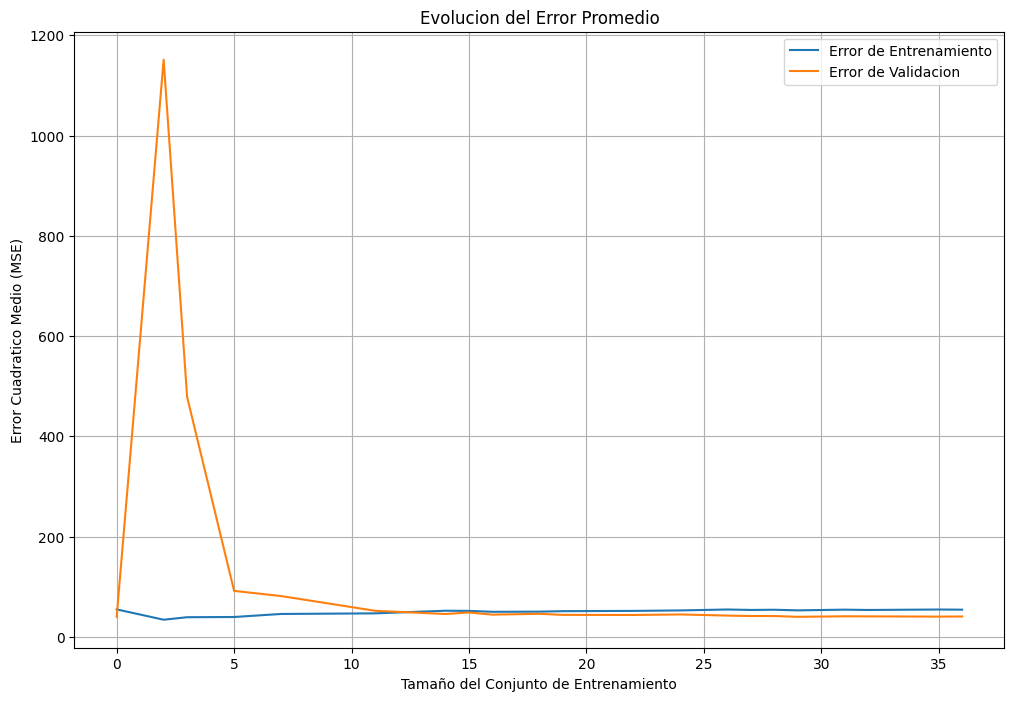

In [52]:
plt.figure(figsize=(12, 8))
plt.plot([0] + sizes, train_errors, label='Error de Entrenamiento')
plt.plot([0] + sizes, val_errors, label='Error de Validacion')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadratico Medio (MSE)')
plt.title('Evolucion del Error Promedio')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
optimo = 20
X_train_opt, _, y_train_opt, _ = train_test_split(X_train, y_train, train_size=optimo, random_state=semilla)

model.fit(X_train_opt, y_train_opt)

mse_train_opt = mean_squared_error(y_train_opt, model.predict(X_train_opt))
mse_val_opt = mean_squared_error(y_val, model.predict(X_val))
mse_test_opt = mean_squared_error(y_test, model.predict(X_test))

print("MSE Entrenamiento Óptimo:", mse_train_opt)
print("MSE Validación Óptimo:", mse_val_opt)
print("MSE Prueba Óptimo:", mse_test_opt)


MSE Entrenamiento Óptimo: 66.2518230596311
MSE Validación Óptimo: 42.70605051819758
MSE Prueba Óptimo: 57.687812460840604


In [54]:
!jupyter nbconvert --to html 'Valhalla.ipynb'

31992.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[NbConvertApp] Converting notebook Valhalla.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 446257 bytes to Valhalla.html
